In [66]:
# def findSPD(L1):
#     m = L1.shape[0]
#     manifold = spd.SPDMatrices(m)
#     for i in range(5):
#         if (gs.all(manifold.belongs(L1 + 0.0001 * np.identity(m)))):
#             return L1 + 10**(-10+i) * np.identity(m)        
    
    

In [ ]:
def find

In [91]:
import geomstats.geometry.euclidean as eu
def LogEuclideanDistance(G1, G2, weight):
    G1.remove_nodes_from(list(nx.isolates(G1)))
    G2.remove_nodes_from(list(nx.isolates(G2)))
    G1.remove_nodes_from(np.setdiff1d(G1.nodes,G2.nodes))
    G2.remove_nodes_from(np.setdiff1d(G2.nodes,G1.nodes))
    L1 = nx.normalized_laplacian_matrix(G1, nodelist = G1.nodes(), weight = weight).toarray()
    L2 = nx.normalized_laplacian_matrix(G2, nodelist = G2.nodes(), weight = weight).toarray()
    m = L2.shape[0]  
    
    
    manifold = eu.Euclidean(m)
    print(gs.all(manifold.belongs(L1)), gs.all(manifold.belongs(L2)))
#     if not gs.all(manifold.belongs(L1)):
    L1 = findSPD(L1)
#     if not gs.all(manifold.belongs(L2)):
    L2 = findSPD(L2)
#     print(gs.linalg.norm(manifold.logm(L1) - manifold.logm(L2) ))

    
    return gs.linalg.norm(manifold.logm(L1) - manifold.logm(L2) )
    

In [2]:
from geomstats.geometry.matrices import Matrices
def affineInviantDistance(G1, G2, weight):
    G1.remove_nodes_from(list(nx.isolates(G1)))
    G2.remove_nodes_from(list(nx.isolates(G2)))
    G1.remove_nodes_from(np.setdiff1d(G1.nodes,G2.nodes))
    G2.remove_nodes_from(np.setdiff1d(G2.nodes,G1.nodes))
    L1 = nx.normalized_laplacian_matrix(G1, nodelist = G1.nodes(), weight = weight).toarray()
    L2 = nx.normalized_laplacian_matrix(G2, nodelist = G2.nodes(), weight = weight).toarray()
    m = L2.shape[0]  
    manifold = spd.SPDMatrices(m)    
    L1 = findSPD(L1)
    L2 = findSPD(L2)
    A = gs.linalg.inv(gs.linalg.sqrtm(L1))
    return gs.linalg.norm(manifold.logm(Matrices.mul(A, L2, A)))
    

INFO: Using numpy backend


In [3]:
def findSPD(L1):
    eigval, eigvec = np.linalg.eig(L1)
    eigval[eigval < 0.5] = 0.5

    return eigvec.dot(np.diag(eigval)).dot(eigvec.T)

In [18]:
def distance_kullback(G1, G2, weight):
    """Kullback leibler divergence between two covariance matrices A and B.

    :param A: First covariance matrix
    :param B: Second covariance matrix
    :returns: Kullback leibler divergence between A and B

    """
    G1.remove_nodes_from(list(nx.isolates(G1)))
    G2.remove_nodes_from(list(nx.isolates(G2)))
    G1.remove_nodes_from(np.setdiff1d(G1.nodes,G2.nodes))
    G2.remove_nodes_from(np.setdiff1d(G2.nodes,G1.nodes))
    L1 = nx.normalized_laplacian_matrix(G1, nodelist = G1.nodes(), weight = weight).toarray()
    L2 = nx.normalized_laplacian_matrix(G2, nodelist = G2.nodes(), weight = weight).toarray()
    m = L2.shape[0]  
    manifold = spd.SPDMatrices(m)
    if not gs.all(manifold.belongs(L1)):
        L1 = findSPD(L1)
    if not gs.all(manifold.belongs(L2)):
        L2 = findSPD(L2)
#     [A,B] = [nx.adjacency_matrix(G, weight = weight) for G in [G1,G2]]
#     print(A.shape)
    dim = L1.shape[0]
#     print(dim)
    logdet = np.log(np.linalg.det(L1) / np.linalg.det(L2))
    kl = np.trace(np.dot(np.linalg.inv(L2), L1)) - dim + logdet
    print(0.5 * kl)
    return 0.5 * kl

In [34]:
from scipy.spatial import distance
def euclidean(G1, G2, weight):
    G1.remove_nodes_from(list(nx.isolates(G1)))
    G2.remove_nodes_from(list(nx.isolates(G2)))
    G1.remove_nodes_from(np.setdiff1d(G1.nodes,G2.nodes))
    G2.remove_nodes_from(np.setdiff1d(G2.nodes,G1.nodes))
    A1,A2 = [nx.adjacency_matrix(G, weight = weight).todense() for G in [G1,G2]]
#     print(A1.shape, A2.shape)
#     d = distance.euclidean(A1, A2)
#     print(d)
#     print(gs.linalg.norm(abs(A1 - A2), 2))
    return gs.linalg.norm(abs(A1 - A2))

In [14]:
A = [[2, -2, 1], [-1, 3, -1], [2, -4, 1]]
print(gs.linalg.norm(A, 2))


6.316624790355402


In [2]:
import numpy as np
import networkx as nx
from numpy import linalg as la
import geomstats.backend as gs

INFO: Using numpy backend


In [3]:
# For adjacency matrix
def spectralEuclideanDistanceAM(G1, G2, weight):
#     G1.remove_nodes_from(list(nx.isolates(G1)))
#     G2.remove_nodes_from(list(nx.isolates(G2)))
#     G1.remove_nodes_from(np.setdiff1d(G1.nodes,G2.nodes))
#     G2.remove_nodes_from(np.setdiff1d(G2.nodes,G1.nodes))
    L1 = nx.adjacency_matrix(G1, nodelist = G1.nodes(), weight = weight).todense()
    L2 = nx.adjacency_matrix(G2, nodelist = G1.nodes(), weight = weight).todense()
    w_a = np.linalg.eigvals(L1)
    w_a = np.sort(w_a)

    w_b = np.linalg.eigvals(L2)
    w_b = np.sort(w_b)

    distance = np.linalg.norm(w_a - w_b, 2, 0)

    return distance

In [11]:
# For graph laplacian
def spectralEuclideanDistance(G1, G2, weight):
    G1.remove_nodes_from(list(nx.isolates(G1)))
    G2.remove_nodes_from(list(nx.isolates(G2)))
    G1.remove_nodes_from(np.setdiff1d(G1.nodes,G2.nodes))
    G2.remove_nodes_from(np.setdiff1d(G2.nodes,G1.nodes))
    L1 = nx.normalized_laplacian_matrix(G1, nodelist = G1.nodes(), weight = weight).toarray()
    L2 = nx.normalized_laplacian_matrix(G2, nodelist = G2.nodes(), weight = weight).toarray()
    w_a = np.linalg.eigvals(L1)
    w_a = np.sort(w_a)

    w_b = np.linalg.eigvals(L2)
    w_b = np.sort(w_b)

    distance = np.linalg.norm(w_a - w_b, 2, 0)

    return distance

In [3]:
def geodesic(G1, G2, weight):
    G1.remove_nodes_from(list(nx.isolates(G1)))
    G2.remove_nodes_from(list(nx.isolates(G2)))
    G1.remove_nodes_from(np.setdiff1d(G1.nodes,G2.nodes))
    G2.remove_nodes_from(np.setdiff1d(G2.nodes,G1.nodes))
    L1 = nx.normalized_laplacian_matrix(G1, nodelist = G1.nodes(), weight = weight).toarray()
    L2 = nx.normalized_laplacian_matrix(G2, nodelist = G2.nodes(), weight = weight).toarray()
    covmean = sqrtm(L1.dot(L2))         
    d =np.sqrt(gs.trace(L1 + L2 - 2.0 * covmean))
    print(abs(d))
    return abs(d)

In [5]:
import csv
import networkx as nx
# import matplotlib.pyplot as plt
with open('/mnt/c/Users/shail/Downloads/HCP_zygocity.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    node_dict = {} #store node id mapping with cell id        
    dic = {}
    counter = 0
    for row in reader:
        if(row['ZygosityGT'] == "MZ" or row['ZygosityGT'] == "DZ"):
            if not dic.get(row['ZygosityGT'] + "_" + row['FAMILY_ID']):
                dic[row['ZygosityGT'] + "_" + row['FAMILY_ID']] = [row['SUBJECT_ID']]
            else:
                dic[row['ZygosityGT'] + "_" + row['FAMILY_ID']].append(row['SUBJECT_ID'])            
            

In [35]:
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import geomstats.geometry.spd_matrices as spd
from scipy.linalg import sqrtm
d_MZ_fiber_length_mean = []
d_DZ_fiber_length_mean = []

d_MZ_FA_mean = []
d_DZ_FA_mean = []

d_MZ_number_of_fibers = []
d_DZ_number_of_fibers = []

for key in dic.keys():
    try:
        G1 = nx.read_graphml("/mnt/c/Users/shail/Downloads/repeated_10_scale_234nodes/"+ dic[key][0] +"_repeated10_scale125.graphml")
        G2 = nx.read_graphml("/mnt/c/Users/shail/Downloads/repeated_10_scale_234nodes/" + dic[key][1] +"_repeated10_scale125.graphml")

        if (key.split("_")[0] == "MZ"):
            d_m = euclidean(G1, G2, "fiber_length_mean")            
            d_MZ_fiber_length_mean.append(d_m)
#             d_m = euclidean(G1, G2, "FA_mean")            
#             d_MZ_FA_mean.append(d_m)
            d_m = euclidean(G1, G2, "number_of_fibers")            
            d_MZ_number_of_fibers.append(d_m)
        elif (key.split("_")[0] == "DZ"):            
            d_d = euclidean(G1, G2, "fiber_length_mean")
    #         if(not math.isnan(d_d)):                
            d_DZ_fiber_length_mean.append(d_d)
#             d_d = euclidean(G1, G2, "FA_mean")
#             d_DZ_FA_mean.append(d_d)
            d_d = euclidean(G1, G2, "number_of_fibers")
            d_DZ_number_of_fibers.append(d_d)

    except:
        continue


fiber_length_mean 0.34296229032637493


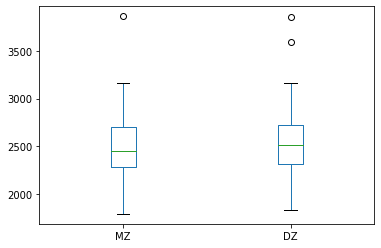

In [36]:
d = pd.DataFrame(list(zip(d_MZ_fiber_length_mean, d_DZ_fiber_length_mean)), 
               columns =['MZ', 'DZ']) 
d.boxplot(column=['MZ', 'DZ'], grid=False)
fvalue, pvalue = stats.wilcoxon(d['MZ'], d['DZ'])
print("fiber_length_mean",pvalue)


number_of_fibers 0.0005498562885538383


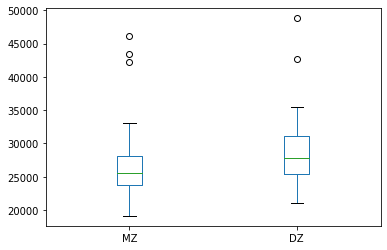

In [37]:
d = pd.DataFrame(list(zip(d_MZ_number_of_fibers, d_DZ_number_of_fibers)), 
               columns =['MZ', 'DZ']) 
d.boxplot(column=['MZ', 'DZ'], grid=False)
fvalue, pvalue = stats.wilcoxon(d['MZ'], d['DZ'])
print("number_of_fibers",pvalue)


FA_mean 0.007858995582023921


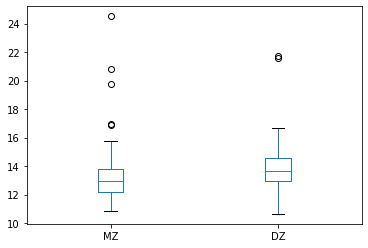

In [24]:
d = pd.DataFrame(list(zip(d_MZ_FA_mean, d_DZ_FA_mean)), 
               columns =['MZ', 'DZ']) 
d.boxplot(column=['MZ', 'DZ'], grid=False)
fvalue, pvalue = stats.wilcoxon(d['MZ'], d['DZ'])
print("FA_mean",pvalue)

In [42]:

import geomstats.geometry.riemannian_metric as rm
def buresWasserstein(G1, G2, weight):
    G1.remove_nodes_from(list(nx.isolates(G1)))
    G2.remove_nodes_from(list(nx.isolates(G2)))
    G1.remove_nodes_from(np.setdiff1d(G1.nodes,G2.nodes))
    G2.remove_nodes_from(np.setdiff1d(G2.nodes,G1.nodes))
    L1 = nx.normalized_laplacian_matrix(G1, nodelist = G1.nodes(), weight = weight).toarray()
    L2 = nx.normalized_laplacian_matrix(G2, nodelist = G2.nodes(), weight = weight).toarray()
    m = L2.shape[0]  
    manifold = spd.SPDMatrices(m)
#     if not gs.all(manifold.belongs(L1)):
    L1 = findSPD(L1)
#     if not gs.all(manifold.belongs(L2)):
    L2 = findSPD(L2)
    manifold2 = spd.SPDMetricBuresWasserstein(m)
    return manifold2.squared_dist(L1, L2)

In [74]:
import geomstats.geometry.hypersphere as hs

def hypersphereGD(G1, G2, weight):
    G1.remove_nodes_from(list(nx.isolates(G1)))
    G2.remove_nodes_from(list(nx.isolates(G2)))
    G1.remove_nodes_from(np.setdiff1d(G1.nodes,G2.nodes))
    G2.remove_nodes_from(np.setdiff1d(G2.nodes,G1.nodes))
    L1 = nx.normalized_laplacian_matrix(G1, nodelist = G1.nodes(), weight = weight).toarray()
    L2 = nx.normalized_laplacian_matrix(G2, nodelist = G2.nodes(), weight = weight).toarray()
    m = L2.shape[0]  
    manifold = hs.Hypersphere(m)
    
    manifold2 = hs.HypersphereMetric(m)
    L1 = findSPD(L1)
    L2 = findSPD(L2)
    print(manifold.belongs(L1), manifold.belongs(L2) )
    print(manifold2.squared_dist(L1, L2))
    return manifold2.squared_dist(L1, L2)

In [15]:

import geomstats.geometry.riemannian_metric as rm
def riemannianGD(G1, G2, weight):
    G1.remove_nodes_from(list(nx.isolates(G1)))
    G2.remove_nodes_from(list(nx.isolates(G2)))
    G1.remove_nodes_from(np.setdiff1d(G1.nodes,G2.nodes))
    G2.remove_nodes_from(np.setdiff1d(G2.nodes,G1.nodes))
    L1 = nx.normalized_laplacian_matrix(G1, nodelist = G1.nodes(), weight = weight).toarray()
    L2 = nx.normalized_laplacian_matrix(G2, nodelist = G2.nodes(), weight = weight).toarray()
    m = L2.shape[0]  
    manifold = spd.SPDMatrices(m)
#     if not gs.all(manifold.belongs(L1)):
    L1 = findSPD(L1)
#     if not gs.all(manifold.belongs(L2)):
    L2 = findSPD(L2)
    manifold2 = rm.RiemannianMetric(m)
    return manifold2.dist(L1, L2)

In [34]:
flag = 0
import numpy as np
import pandas as pd
import math
import geomstats.geometry.spd_matrices as spd
from scipy.linalg import sqrtm
d_MZ_fiber_length_mean = []
d_DZ_fiber_length_mean = []

d_MZ_FA_mean = []
d_DZ_FA_mean = []

d_MZ_number_of_fibers = []
d_DZ_number_of_fibers = []

for key in dic.keys():
    try:

        G1 = nx.read_graphml("/mnt/c/Users/shail/Downloads/repeated_10_scale_234/"+ dic[key][0] +"_repeated10_scale33.graphml")
        G2 = nx.read_graphml("/mnt/c/Users/shail/Downloads/repeated_10_scale_234/" + dic[key][1] +"_repeated10_scale33.graphml")


        if (key.split("_")[0] == "MZ"):
            flag += 1
            if flag < 74:
                d_m = hypersphereGD(G1, G2, "fiber_length_mean")            
                d_MZ_fiber_length_mean.append(d_m)
                d_m = hypersphereGD(G1, G2, "FA_mean")            
                d_MZ_FA_mean.append(d_m)
                d_m = hypersphereGD(G1, G2, "number_of_fibers")            
                d_MZ_number_of_fibers.append(d_m)
        elif (key.split("_")[0] == "DZ"):            
            d_d = hypersphereGD(G1, G2, "fiber_length_mean")
    #         if(not math.isnan(d_d)):                
            d_DZ_fiber_length_mean.append(d_d)
            d_d = hypersphereGD(G1, G2, "FA_mean")
            d_DZ_FA_mean.append(d_d)
            d_d = hypersphereGD(G1, G2, "number_of_fibers")
            d_DZ_number_of_fibers.append(d_d)

    except:
        print("exception")
        continue

1042.0833055002295
7.562004599580721
34672.325042369885
exception
973.8342266647577
6.888199634422534
27050.83004733866
exception
exception
922.5632995307012
5.836001068237436
33787.503651960586
exception
849.0245224970032
5.953165541769202
26971.05051833354
798.4815462060006
5.1718483845870775
34406.24917075385
1085.2453383059858
5.999450880831246
30666.56009452723
1414.917924832045
11.577337210384448
58982.88672387314
1128.8142114588857
5.780713922162269
33028.202542486324
1181.8696811369985
5.672827616281939
32899.43148587449
exception
979.6943034666612
7.7720052327384055
27165.277873371735
1000.846357425443
4.854958983908611
28973.465581135613
exception
963.7187514967547
5.349380848338665
28395.833623746636
1020.1575822820178
6.831235030656081
28419.42374118888
860.4514187971994
5.288054732006043
31836.931889316846
1019.4794855352477
5.311960421900253
23605.510081070057
1003.791969752593
5.789697899346244
29365.88110322505
870.5279958967985
5.266554291646752
31935.0592707294
1700.2

1143.9513720519633
6.025293745373922
33444.46195093442
764.1390421206005
4.76203659560233
27244.43636838997
831.0702489481409
4.95011530610846
34981.67568483177


In [39]:
print(len(d_MZ_fiber_length_mean))

73


fiber_length_mean 0.010527678261018967


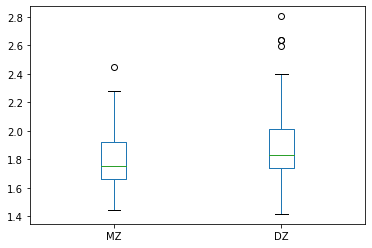

In [83]:
import scipy.stats as stats
d = pd.DataFrame(list(zip(d_MZ_fiber_length_mean, d_DZ_fiber_length_mean)), 
               columns =['MZ', 'DZ']) 
d.boxplot(column=['MZ', 'DZ'], grid=False)
fvalue, pvalue = stats.f_oneway(d['MZ'], d['DZ'])
print("fiber_length_mean",pvalue)


number_of_fibers 3.845558873788221e-05


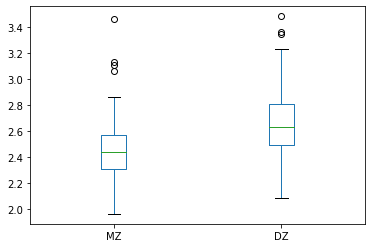

In [84]:
d = pd.DataFrame(list(zip(d_MZ_number_of_fibers, d_DZ_number_of_fibers)), 
               columns =['MZ', 'DZ']) 
d.boxplot(column=['MZ', 'DZ'], grid=False)
fvalue, pvalue = stats.f_oneway(d['MZ'], d['DZ'])
print("number_of_fibers",pvalue)


FA_mean 0.022743730590309204


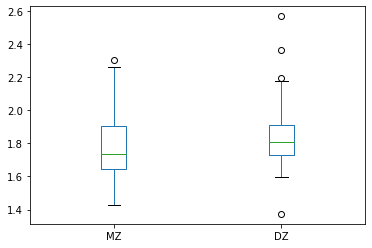

In [85]:
d = pd.DataFrame(list(zip(d_MZ_FA_mean, d_DZ_FA_mean)), 
               columns =['MZ', 'DZ']) 
d.boxplot(column=['MZ', 'DZ'], grid=False)
fvalue, pvalue = stats.f_oneway(d['MZ'], d['DZ'])
print("FA_mean",pvalue)

In [12]:
G1 = nx.read_graphml("/mnt/c/Users/shail/Downloads/repeated_10_scale_33/102614_repeated10_scale33.graphml")
weight = "fiber_length_mean"
weight = "number_of_fibers"
D1 = nx.adjacency_matrix(G1, weight = weight).todense()
L1 = nx.normalized_laplacian_matrix(G1, nodelist = G1.nodes(), weight = weight).toarray()
m = L1.shape[0]
manifold = spd.SPDMatrices(m)
print(gs.all(manifold.belongs(findPSD(L1))))


True
